# **Pergunta 13**

**Para responder essa pergunta, mostramos qual o curso com maior valor de alunos que participam de projetos de extensão, e também o valorproporcional a quantidade de alunos por curso.**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
cine_column = ["CO_CINE_ROTULO", "NO_CINE_ROTULO"]
cine = pd.read_csv("/content/drive/MyDrive/microdados_educacao_superior_2019/Microdados_Educação_Superior_2019"+
"/dados/TB_AUX_CINE_BRASIL_2019.CSV", index_col=False, header=0, encoding="cp860", sep ='|')

In [ ]:
alumn_column = ["ID_ALUNO", "IN_COMPLEMENTAR_EXTENSAO", "CO_CINE_ROTULO"]
Talunos = pd.read_csv(r"/content/drive/MyDrive/Curated/Aluno.csv", index_col=False, header=0, usecols=alumn_column)

In [95]:
cine["CO_CINE_ROTULO"] = cine.CO_CINE_ROTULO.astype(str)
Talunos["CO_CINE_ROTULO"] = Talunos.CO_CINE_ROTULO.astype(str)

alunos = Talunos.merge(cine, on="CO_CINE_ROTULO", how='left')
# O merge é feito para adicionar a coluna NO_CINE_ROTULO, que contém o nome dos cursos correspondentes aos seus códigos.
totalAlunos = alunos['NO_CINE_ROTULO'].value_counts()
totalAlunos
# Variável utilizada para organização do código, e que possui as informações de quantos alunos cada curso possui.

Pedagogia                               815369
Direito                                 811884
Administraτπo                           718824
Contabilidade                           399634
Enfermagem                              315745
                                         ...  
Engenharia bioenergΘtica                     7
Letras japonΩs                               6
Comunicaτπo assistiva                        3
AssistΩncia a idosos e a deficientes         1
Rochas ornamentais                           1
Name: NO_CINE_ROTULO, Length: 335, dtype: int64

In [96]:
valid_situation = [1]
result = alunos[alunos['IN_COMPLEMENTAR_EXTENSAO'].isin(valid_situation)]
# Realiza uma seleção que nos retorna quais alunos estão participando de projetos de extensão.

**Aqui é mostrado que 105452 alunos de direito participam de projetos de extensão, e também há um gráfico com os 19 outros cursos com maior número de alunos participando de projetos de extensão.**

In [97]:
primeirosCursos = result['NO_CINE_ROTULO'].value_counts().iloc[:20]
result['NO_CINE_ROTULO'].value_counts()
# Mostra quantos alunos estão participando de projetos de extensão por curso.

Direito                    105452
Pedagogia                   79432
Administraτπo               75614
Enfermagem                  44806
Contabilidade               43961
                            ...  
Processos metal·rgicos          1
Energias renovßveis             1
Manutenτπo de aeronaves         1
Agrimensura                     1
Letras inglΩs                   1
Name: NO_CINE_ROTULO, Length: 275, dtype: int64

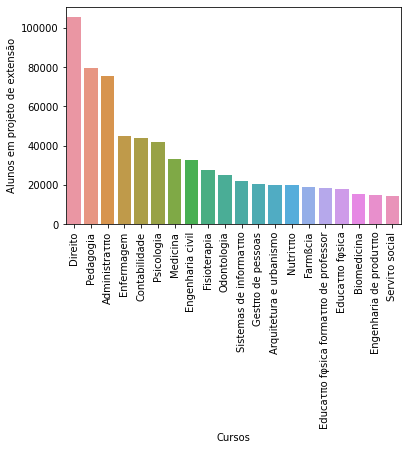

In [101]:
sns.barplot(x=list(primeirosCursos.keys()), y=list(dict(primeirosCursos).values()))
plt.xticks(rotation=90)
plt.ylabel("Alunos em projeto de extensão")
plt.xlabel("Cursos")
plt.show()
# Gráfico de barras para mostrar os 20 cursos com mais alunos participando de projetos de extensão.

**Já aqui, podemos ver que 100% dos alunos do curso de produção de cerveja participam de projetos de extensão.**

In [102]:
extensao = result['NO_CINE_ROTULO'].value_counts()
relacao = extensao/totalAlunos  #Foi verificado que esta divisão nos retorna o resultado esperado.
relacao.sort_values(ascending=(False)) * 100

Produτπo de cerveja                 100.000000
Podologia                            70.394737
Enfermagem formaτπo de professor     59.784946
Psicopedagogia                       48.911353
Defesa cibernΘtica                   42.473746
                                       ...    
Soldagem                                   NaN
Telemßtica                                 NaN
Toxicologia                                NaN
Transporte aΘreo                           NaN
Transporte terrestre                       NaN
Name: NO_CINE_ROTULO, Length: 335, dtype: float64